<a href="https://colab.research.google.com/github/aartivjadhav/machine_learning/blob/main/Heart_disease/heart_attack_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# You are the data scientist at a medical research facility. The facility wants you to
# build a machine learning model to classify if the given data of a patient should tell
# if the patient is at the risk of a heart attack.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

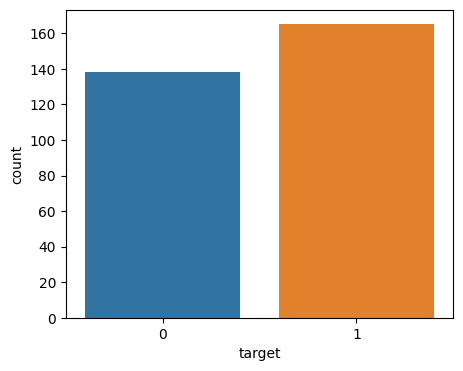

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=data['target'],data=data)
plt.show()

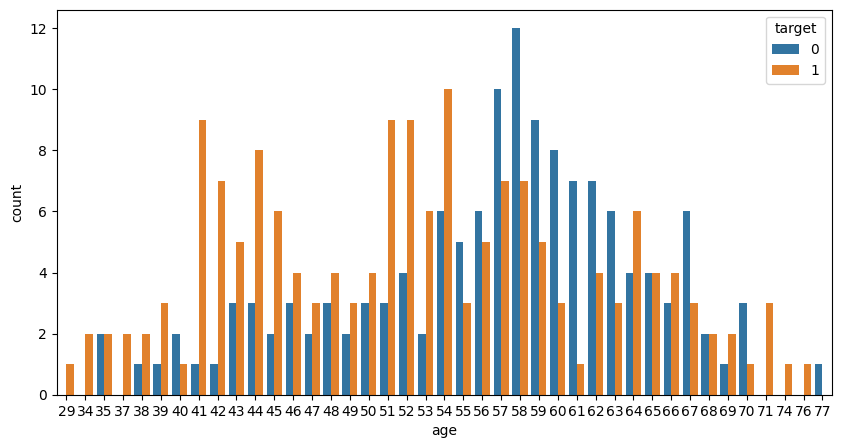

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='age',hue='target')
plt.show()

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

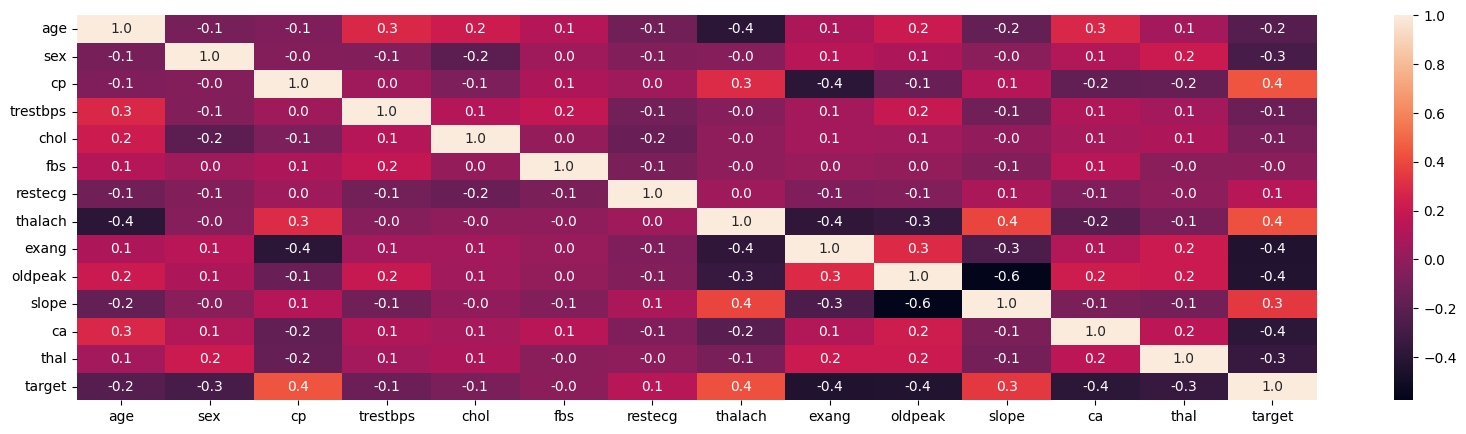

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
col = data.corr()['target'][round(data.corr()['target'],1)==0]
col.index

Index(['fbs'], dtype='object')

In [ ]:
# dropping fbs columns as its correlation with target is 0
data = data.drop(col.index,axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [ ]:
# data is clean and has no null values hence building model

x,y = data.drop('target',axis=1),data['target']

In [ ]:
print(x.shape)
print(y.shape)

(303, 12)
(303,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212, 12)
(212,)
(91, 12)
(91,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[33 11]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



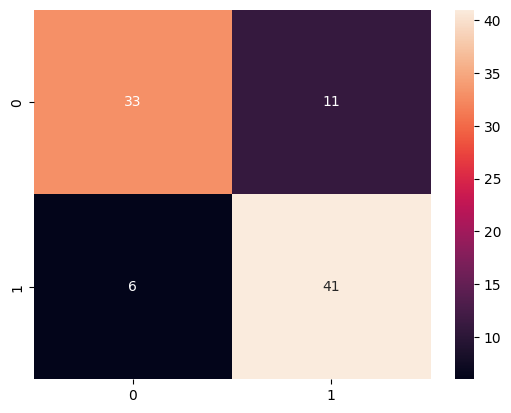

In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# x_train = ss.fit_transform(x_train)
# x_test = ss.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
model_performance(y_test,y_pred)

In [ ]:
# from sklearn.metrics import *
# print(accuracy_score(y_test,y_pred))

0.8131868131868132


In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True)
# plt.show()

In [ ]:
# plot ROC curve

[[33 11]
 [15 32]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        44
           1       0.74      0.68      0.71        47

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



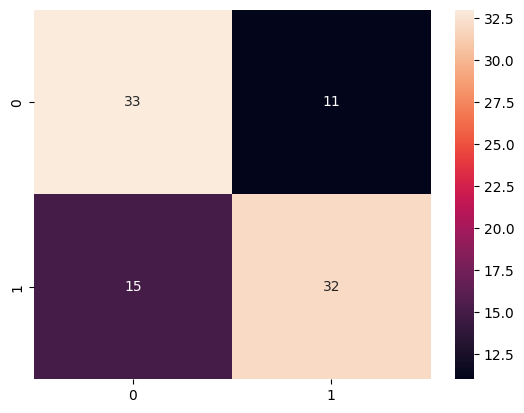

In [ ]:
# decision tree classification
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
model_performance(y_test,y_pred)
# print(accuracy_score(y_test,y_pred))

In [ ]:
data1 = data
data1 = data1.astype(str)
# data1.drop('fbs',axis=1)
x1 = data1.drop('target',axis=1)
y1 = data1['target']

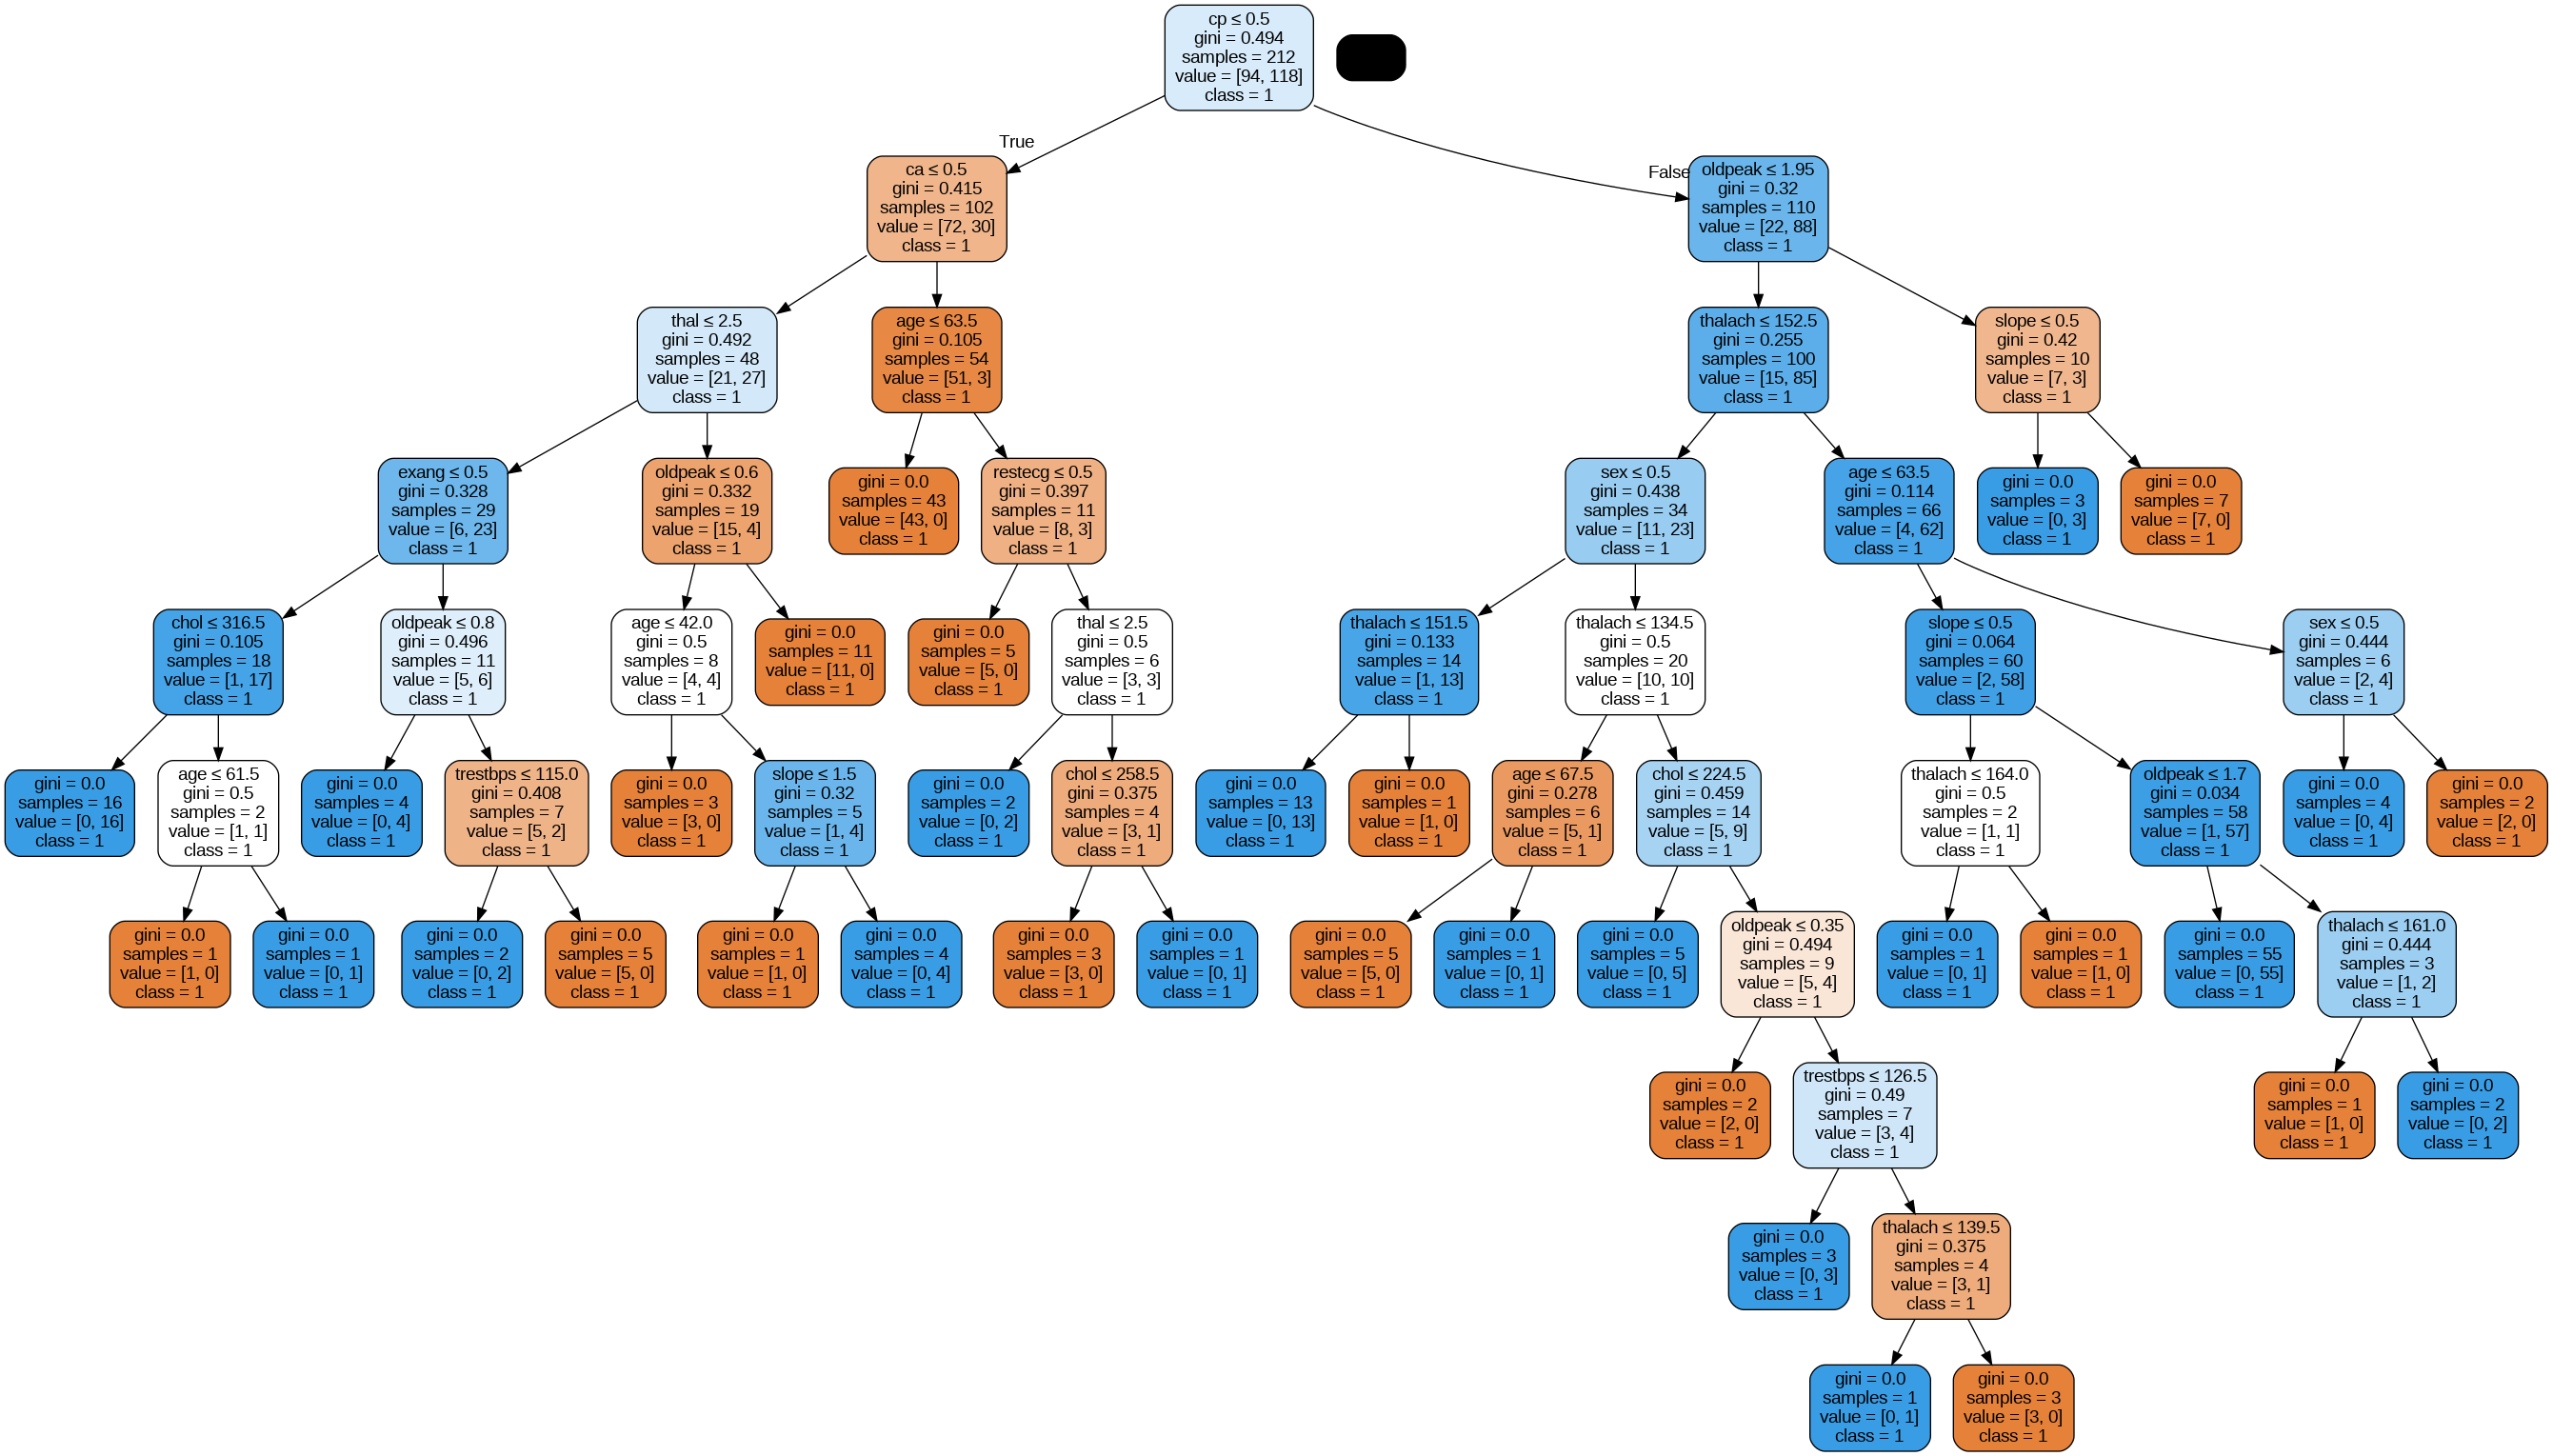

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

dot_data = export_graphviz(
    dtc,out_file=None,
    feature_names = x1.columns,
    class_names = y1,
    filled=True, rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

[[33 11]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



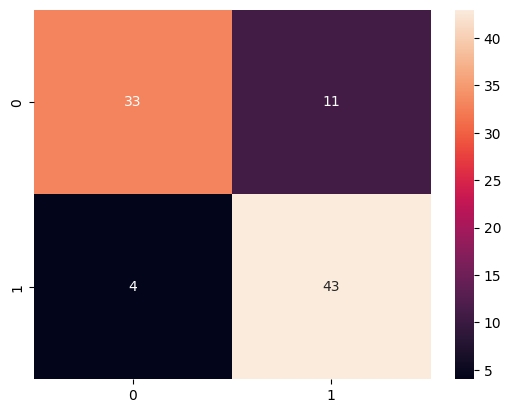

In [ ]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
model_performance(y_test,y_pred)
# print(accuracy_score(y_test,y_pred))

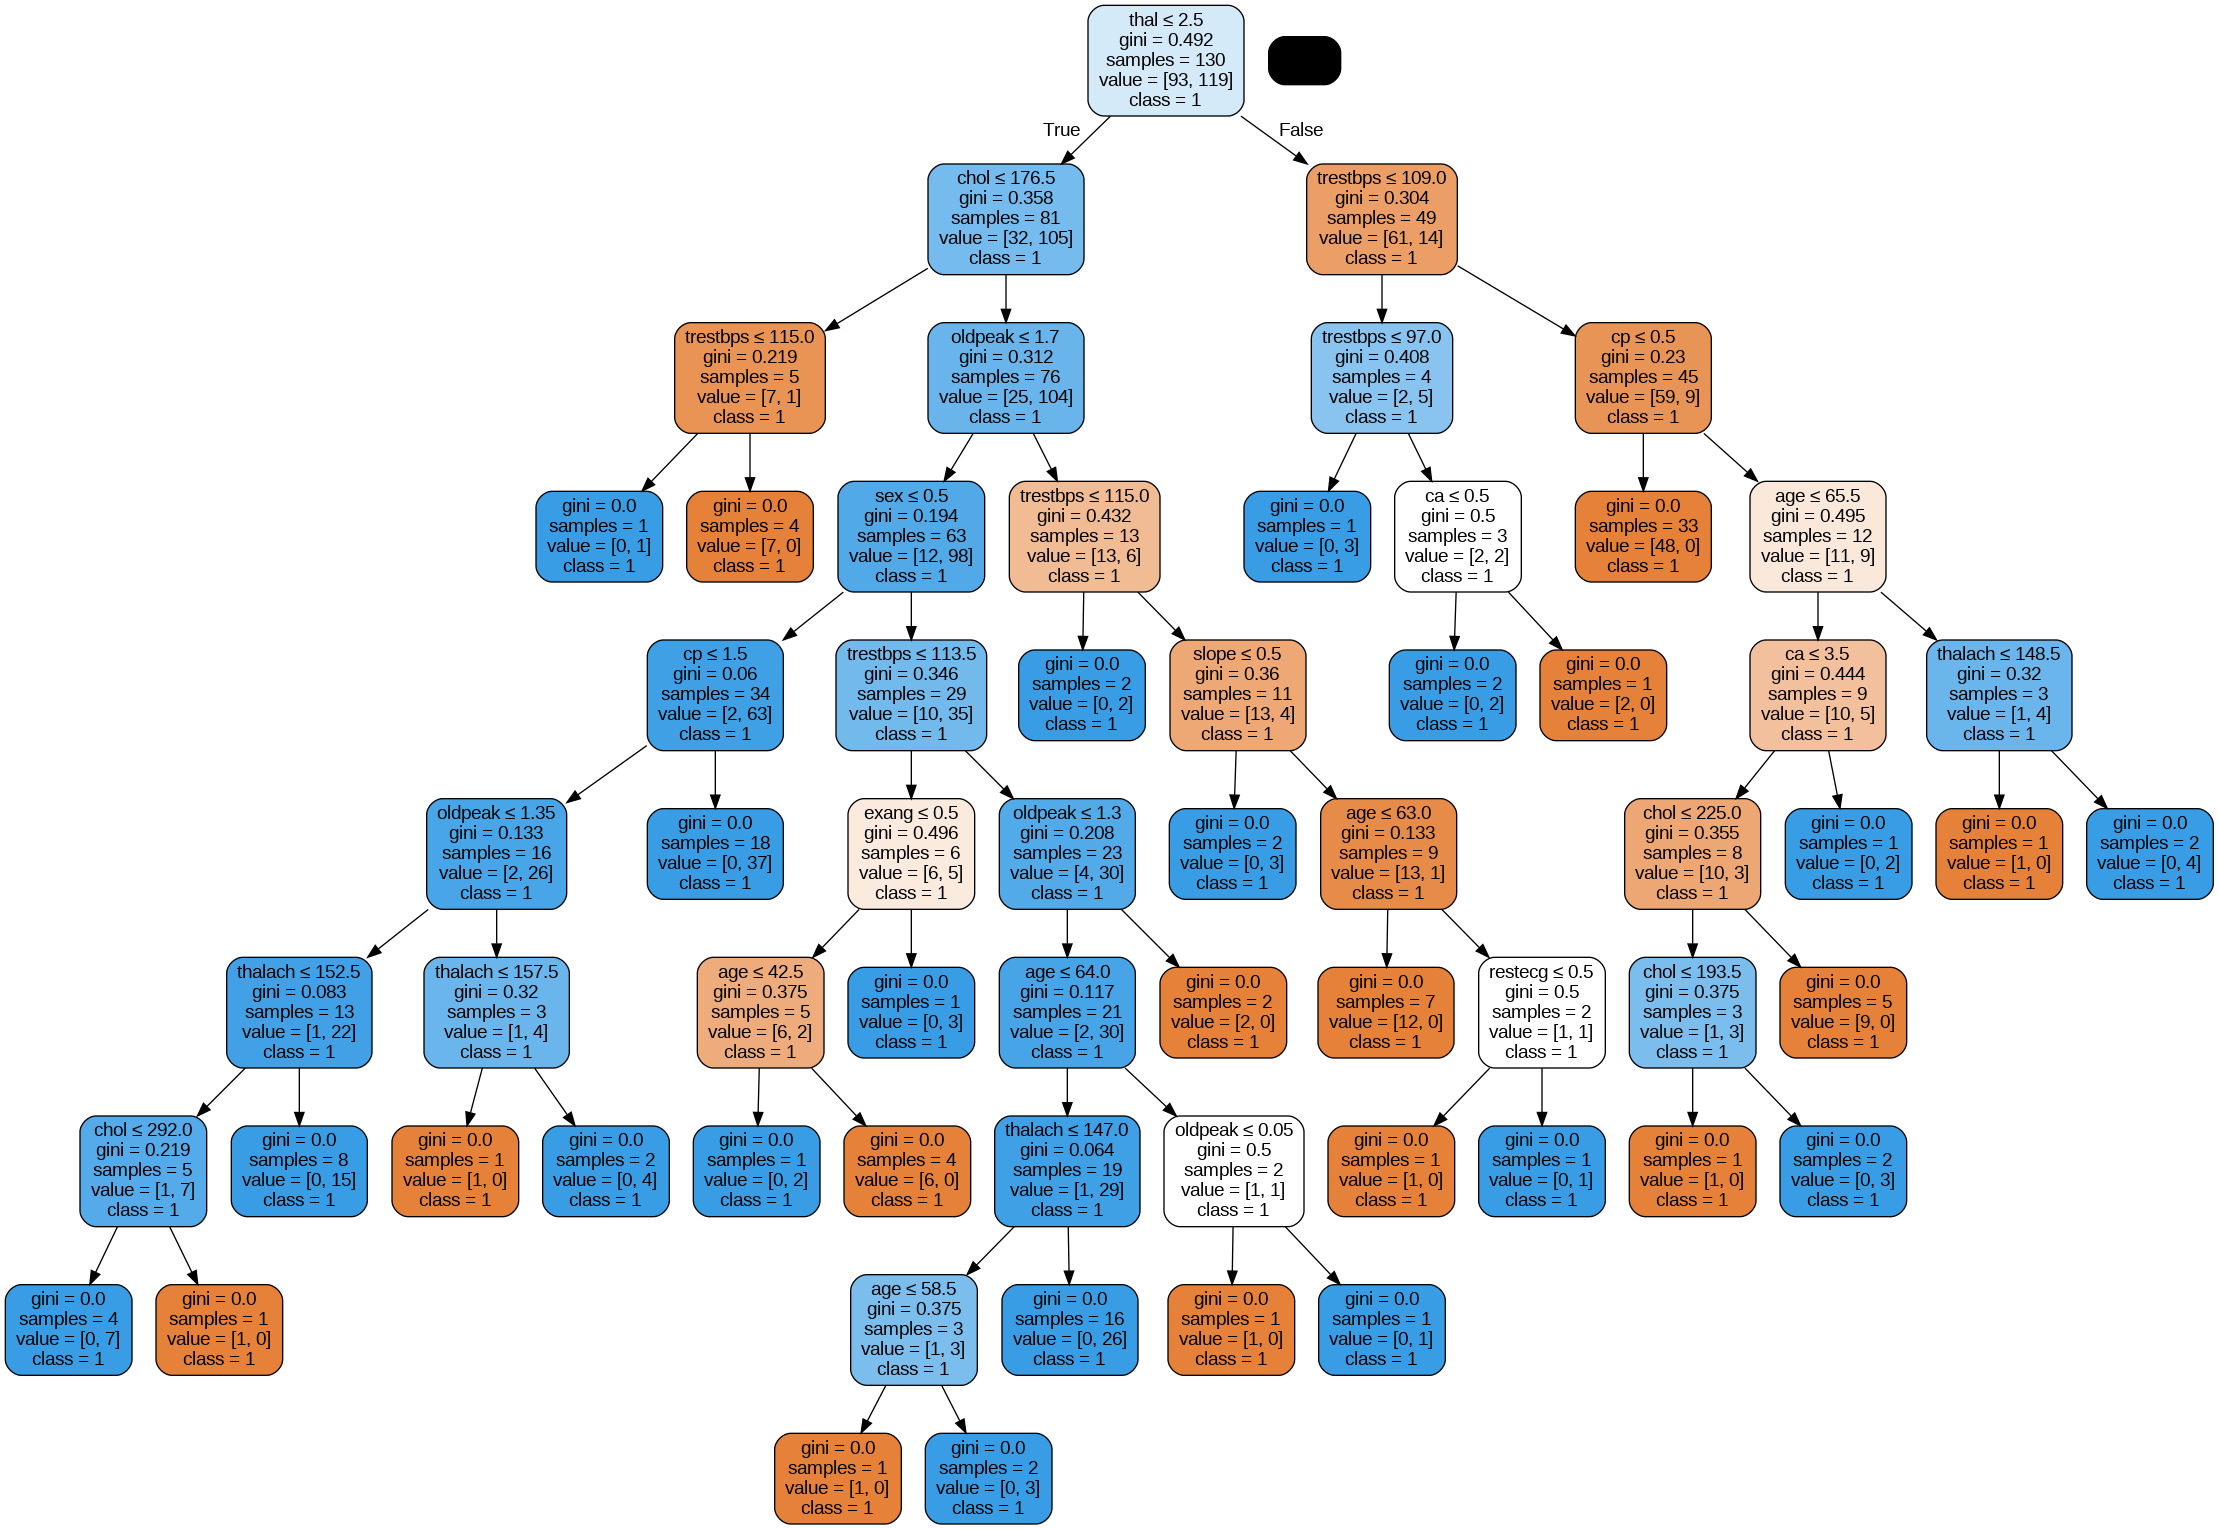

In [ ]:
dot_data = export_graphviz(
    rfc.estimators_[5],out_file=None,
    feature_names = x1.columns,
    class_names = y1,
    filled=True, rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
from sklearn.metrics import *

def model_performance(y_test,y_pred):
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
  plt.show()
# select the best model based on accuracy